In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [2]:
# Load your dataset
# Assuming your dataset has columns 'datetime', 'total_visitor', 'total_accomodation'
# Adjust the file path accordingly

data = pd.read_csv('KepRiau 2015 - 2022.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' column as index
data.set_index('datetime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define your input and output variables
X = data_scaled[:, 1]  # 'total_accomodation' as input
y = data_scaled[:, 0]  # 'total_visitor' as output

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [3]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))


In [4]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)




Epoch 1/50

3/3 - 2s - loss: 0.2754 - val_loss: 0.0249 - 2s/epoch - 673ms/step
Epoch 2/50
3/3 - 0s - loss: 0.2476 - val_loss: 0.0263 - 31ms/epoch - 10ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2214 - val_loss: 0.0313 - 51ms/epoch - 17ms/step
Epoch 4/50
3/3 - 0s - loss: 0.1979 - val_loss: 0.0397 - 35ms/epoch - 12ms/step
Epoch 5/50
3/3 - 0s - loss: 0.1760 - val_loss: 0.0514 - 32ms/epoch - 11ms/step
Epoch 6/50
3/3 - 0s - loss: 0.1574 - val_loss: 0.0664 - 49ms/epoch - 16ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1388 - val_loss: 0.0843 - 29ms/epoch - 10ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1229 - val_loss: 0.1048 - 54ms/epoch - 18ms/step
Epoch 9/50
3/3 - 0s - loss: 0.1106 - val_loss: 0.1281 - 36ms/epoch - 12ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0985 - val_loss: 0.1530 - 42ms/epoch - 14ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0899 - val_loss: 0.1797 - 38ms/epoch - 13ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0825 - val_loss: 0.2067 - 32ms/epoch - 11ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0773 - val_loss:

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


1/1 [==============================] - 0s 314ms/step
Mean Squared Error (MSE): 7860451.637028774
Mean Absolute Error (MAE): 2651.8717763075433
Mean Absolute Percentage Error (MAPE): 25.64%


In [6]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]


1/1 [==============================] - 0s 26ms/step


TEST SIZE 70:30

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [8]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))


In [9]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
3/3 - 2s - loss: 0.3677 - val_loss: 0.0254 - 2s/epoch - 619ms/step
Epoch 2/50
3/3 - 0s - loss: 0.3309 - val_loss: 0.0209 - 36ms/epoch - 12ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2955 - val_loss: 0.0200 - 38ms/epoch - 13ms/step
Epoch 4/50
3/3 - 0s - loss: 0.2628 - val_loss: 0.0226 - 29ms/epoch - 10ms/step
Epoch 5/50
3/3 - 0s - loss: 0.2318 - val_loss: 0.0287 - 31ms/epoch - 10ms/step
Epoch 6/50
3/3 - 0s - loss: 0.2034 - val_loss: 0.0382 - 48ms/epoch - 16ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1766 - val_loss: 0.0510 - 32ms/epoch - 11ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1525 - val_loss: 0.0670 - 45ms/epoch - 15ms/step
Epoch 9/50
3/3 - 0s - loss: 0.1299 - val_loss: 0.0860 - 43ms/epoch - 14ms/step
Epoch 10/50
3/3 - 0s - loss: 0.1094 - val_loss: 0.1082 - 46ms/epoch - 15ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0914 - val_loss: 0.1335 - 38ms/epoch - 13ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0750 - val_loss: 0.1614 - 35ms/epoch - 12ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0613 - val_loss: 0.

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


2/2 [==============================] - 0s 8ms/step
Mean Squared Error (MSE): 17722985.545690108
Mean Absolute Error (MAE): 4141.011065692119
Mean Absolute Percentage Error (MAPE): 40.17%


In [11]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_30 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_30 = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]



1/1 [==============================] - 0s 22ms/step


TEST SIZE 60:40

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [13]:
# Reshape data for GRU input
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))


In [14]:
model = Sequential()
model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
2/2 - 2s - loss: 0.3082 - val_loss: 0.1155 - 2s/epoch - 842ms/step
Epoch 2/50
2/2 - 0s - loss: 0.2899 - val_loss: 0.1097 - 49ms/epoch - 25ms/step
Epoch 3/50
2/2 - 0s - loss: 0.2721 - val_loss: 0.1049 - 31ms/epoch - 16ms/step
Epoch 4/50
2/2 - 0s - loss: 0.2547 - val_loss: 0.1012 - 35ms/epoch - 17ms/step
Epoch 5/50
2/2 - 0s - loss: 0.2379 - val_loss: 0.0985 - 32ms/epoch - 16ms/step
Epoch 6/50
2/2 - 0s - loss: 0.2214 - val_loss: 0.0969 - 33ms/epoch - 17ms/step
Epoch 7/50
2/2 - 0s - loss: 0.2060 - val_loss: 0.0964 - 33ms/epoch - 17ms/step
Epoch 8/50
2/2 - 0s - loss: 0.1909 - val_loss: 0.0969 - 36ms/epoch - 18ms/step
Epoch 9/50
2/2 - 0s - loss: 0.1764 - val_loss: 0.0986 - 35ms/epoch - 18ms/step
Epoch 10/50
2/2 - 0s - loss: 0.1618 - val_loss: 0.1013 - 33ms/epoch - 16ms/step
Epoch 11/50
2/2 - 0s - loss: 0.1481 - val_loss: 0.1052 - 35ms/epoch - 17ms/step
Epoch 12/50
2/2 - 0s - loss: 0.1349 - val_loss: 0.1102 - 32ms/epoch - 16ms/step
Epoch 13/50
2/2 - 0s - loss: 0.1222 - val_loss: 0.

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


2/2 [==============================] - 0s 0s/step
Mean Squared Error (MSE): 15834094.714701325
Mean Absolute Error (MAE): 3555.236824773981
Mean Absolute Percentage Error (MAPE): 34.08%


In [16]:
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods + 1).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_40 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_40 = pd.date_range(start=data.index[-1], periods=future_periods + 2, freq='M')[1:]



1/1 [==============================] - 0s 28ms/step


VISUALIZATION

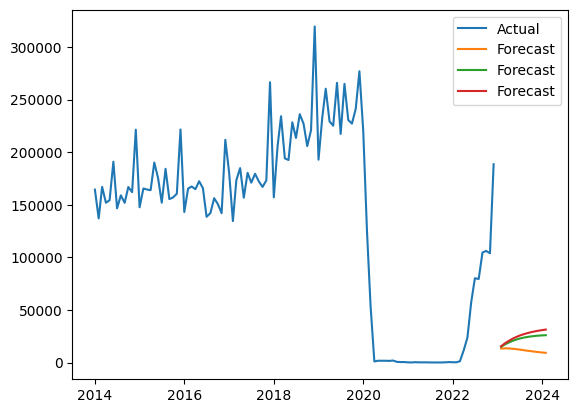

In [17]:

# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast')
plt.plot(future_dates_30, y_future_pred_inv_30, label='Forecast')
plt.plot(future_dates_40, y_future_pred_inv_40, label='Forecast')
plt.legend()
plt.show()